# Week 12 handin - by Benjamin S (cph-bs190)

## Assignment

### Exercise
### Part 1
1. Take a picture of an apple and put it in the image folder in the notebook environment
2. Find the contour of the apple
3. Draw a yellow circle with the center placed on the center of the apple contour
4. Draw a square that precisely holds the apple
5. Take a picture of three seperate apples.
6. Use contours to programmatically identify the number of apples in the photo

### Part 2 (Optional)
1. From [Data](https://unsplash.com/search/photos/jeep) use selenium to download all images of jeeps
2. Use OpenCV to reduce the amount of colors in the images
3. Use OpenCV to find corners [Help](https://docs.opencv.org/master/d8/dd8/tutorial_good_features_to_track.html)
4. (EXTRA) Find all the wheels

### Part 3 (Only if you have extra time)
Follow this tutorial
https://www.mygreatlearning.com/blog/opencv-tutorial-in-python/#sh17

Take any number of exercises, that you can test out and try to apply the techniques on other different images of your own choice. Be aware that using the camera requires you to not use the docker setup. So if you want to play with that you would have to install Anaconda and OpenCV on you own machine.

## Status
I have completed all mandatory exercises. 

I tried figuring out how to programmatically find the center of the contour and the bounds (for exercises 3 and 4),  
but I couldn't figure out how to do it, so I just drew the shapes directly on the contour myself.

# Exercise
## Part 1
### 1

In [ ]:
pip install cv2

<class 'numpy.ndarray'> (512, 512, 3)


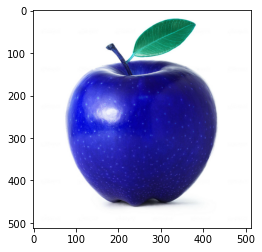

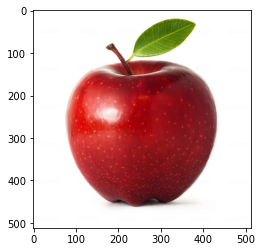

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/Apple.png')
print(type(img),img.shape)
plt.imshow(img)
plt.figure()
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)


### 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


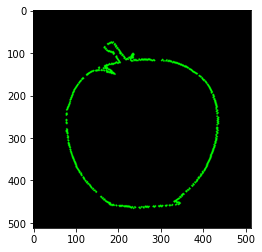

In [79]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
threshold = 200
ret, thresh_img = cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

areaArray = []
for i, c in enumerate(contours):
    area = cv2.contourArea(c)
    areaArray.append(area)

sorteddata = sorted(zip(areaArray, contours), key=lambda x: x[0], reverse=True)
sndLargest = sorteddata[1][1]

img_contours = np.zeros(img.shape)
cv2.drawContours(img_contours, sndLargest, -1, (0,255,0), 3)

plt.imshow(img_contours)

### 3 - 4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


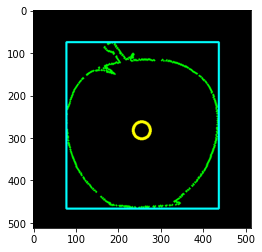

In [80]:
draw_img = img_contours.copy() 

# finding x and y coordinates for the center of the apple contour
M = cv2.moments(sndLargest)
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])

# creating square with boundingRect to get boundaries of the apple contour taken into account
rect = cv2.boundingRect(sndLargest)
x,y,w,h = rect

cv2.circle(draw_img, (cX, cY), radius=20, color=(255,200,0), thickness=5)
cv2.rectangle(draw_img,(x, y),(x+w, y+h),(0,255,255),3)
plt.imshow(draw_img) 

### 5 - 6

Image shape (682, 1023, 3) Thresh (682, 1023) [  0 254 255]
There are 3 apples


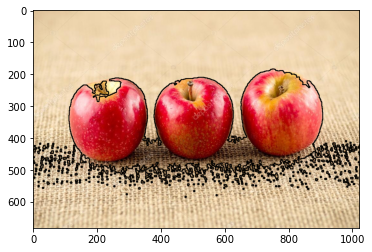

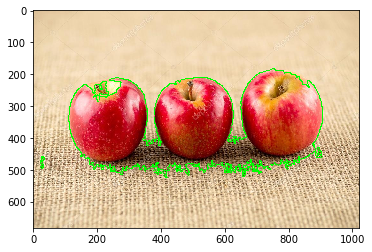

In [84]:
three_apples = cv2.imread("images/three_apples.jpg")
three_apples = cv2.cvtColor(three_apples, cv2.COLOR_BGR2RGB)

img_hsv = cv2.cvtColor(three_apples, cv2.COLOR_BGR2HSV)

ret, thresh_H = cv2.threshold(img_hsv[:,:,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret, thresh_S = cv2.threshold(img_hsv[:,:,1], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

kernel = np.ones((5, 5), np.uint8)
thresh = thresh_H + thresh_S
print('Image shape',img_hsv.shape,'Thresh',thresh.shape,np.unique(thresh))
img_dilated = cv2.dilate(thresh, kernel, iterations = 1)

(contours, hierarchy) = cv2.findContours(img_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
im1 = three_apples.copy()
for c in contours:
    cv2.drawContours(im1, contours=[c], contourIdx=-1, color=(0,0,0),thickness=2)
plt.imshow(im1)
plt.figure()

im2 = three_apples.copy()
count = 0
for c in contours:
    if cv2.contourArea(c) > 220:
        count+=1
        cv2.drawContours(im2, [c], -1, (0, 255, 0), 2)

plt.imshow(im2, interpolation='none')
print(f'There are {count} apples')